<div style="display: flex; align-items: center; justify-content: center; text-align: center;">
  <img src="https://coursereport-s3-production.global.ssl.fastly.net/uploads/school/logo/219/original/CT_LOGO_NEW.jpg" width="100" style="margin-right: 10px;">
  <div>
    <h1><b>🧪 Lab - MPG Predictions</b></h1>
  </div>
</div>


## Part 1: Getting the data
The dataset provided in this repository (`./data/auto.csv`) consists of various descriptions of cars along with their miles per gallon (mpg). A data dictionary for this dataset can be found in the README.

**Read in the data and display the first 5 rows.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
df = pd.read_csv('/gdrive/MyDrive/Coding Temple/7 - Machine Learning Regression/Coding-Temple-M7-Lab-MPG-Predictions/data/auto.csv')

In [ ]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,1


## Part 2: Data Cleaning

There are a few issues with this dataset. To help you identify and fix these issues, you are told:
- The `origin` column should not be a part of this dataset and you should drop it.
- Any null values in the `cylinders` column are clerical errors. They should all be 4's.
- All columns in this dataset should be numeric. If there are unknown values in any column other than the `cylinders` column, they should be dropped.

**Please clean up the dataset.**

In [ ]:
# Drop the 'origin' column
df = df.drop('origin', axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8.0,307.0,130.0,3504.0,12.0
1,15.0,8.0,350.0,165.0,3693.0,11.5
2,18.0,8.0,318.0,150.0,3436.0,11.0
3,16.0,8.0,304.0,150.0,3433.0,12.0
4,17.0,8.0,302.0,140.0,3449.0,10.5


In [ ]:
# Replace null values in 'cylinders' column with the number 4
df['cylinders'] = df['cylinders'].fillna(4)

In [ ]:
df.horsepower = pd.to_numeric(df.horsepower, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
dtypes: float64(6)
memory usage: 18.8 KB


In [ ]:
df.isnull().sum()  # 6 null values in the horsepower column, we will need to drop those rows

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
dtypes: float64(6)
memory usage: 21.4 KB


## Part 3: EDA

You are asked to give the following to the hiring manager:
- Descriptive statistics of the horsepower column
- A scatterplot of weight compared to acceleration colored orange with a title and axis labels

**Please display these.**

In [ ]:
# Descriptive statistics of the horsepower column
df.horsepower.describe()

,horsepower
count,392.000000
mean,104.469388
std,38.491160
min,46.000000
25%,75.000000
50%,93.500000
75%,126.000000
max,230.000000


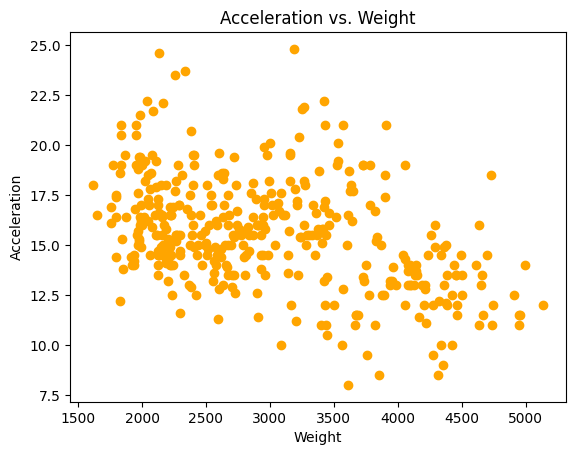

In [ ]:
plt.scatter(df.weight, df.acceleration,color='orange')
plt.xlabel('Weight')
plt.ylabel('Acceleration')
plt.title('Acceleration vs. Weight')
plt.show()

## Part 4: Modeling

**Fit a linear regression model to predict the mpg. Use *all* columns (other than your target) in your model to predict the concrete compressive strength.**
* Please use a random state of `42` when splitting your data
* Use 85% of the dataset for training and the other 15% for testing

In [ ]:
lr = LinearRegression()

In [ ]:
features = df.drop('mpg', axis=1)
target = df['mpg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=42)

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = lr.predict(X_test)
predictions

array([29.8527494 , 24.58073361, 32.31204923, 31.00452485, 25.83805988,
       29.77659846, 10.16801589, 29.18291684, 22.24199804, 32.50803372,
       13.99216476, 23.66250747, 12.99671425, 29.69920863, 20.02235372,
       26.76089557, 23.17925079, 28.71894216, 26.8114299 , 27.32615887,
       24.58499697, 30.82944976, 31.00016896, 18.7588585 , 31.21271361,
       28.54088339, 24.84031462, 20.89326798, 32.07967093, 27.77361488,
       13.04466105, 22.7027403 , 18.57684252, 27.22166309, 12.52708823,
       30.99068485, 12.40545705, 29.6917077 , 14.18581931,  8.9512803 ,
       15.65753974, 30.05941288, 30.71089575, 28.91695083, 11.78950639,
        8.05797217, 21.83971013, 30.22235368, 28.42820814, 31.18692345,
       14.16787131, 28.19003909, 28.38179454, 29.10176793, 23.68785465,
       19.50657905, 21.27878736, 23.8011384 , 27.69612925])

## Part 5: Evaluation
### $R^2$ Score
---

Use `.score` to evaluate the $R^2$ score of our model.

In [ ]:
# Training r2 score
lr.score(X_train, y_train)

0.707766373667193

In [ ]:
# Testing r2 score
lr.score(X_test, y_test)

0.7042260258153821

Interpret the testing $R2$:

$70.4\%$ of the variability in the model can be explained by the features in the model. There does not appear to be any overfitting or underfitting and the model seems to generalize well.

### RMSE Score
---

Use `mean_squared_error` to evaluate the RMSE score of our model.

`mean_squared_error` requires two parameters:
- `y_true` : The actual y values
- `y_pred` : Our model's predicted y values

Therefore, we need to use our model to make predictions first!

In [ ]:
# Make predictions on training set
lr.predict(X_train)

array([28.46912912,  6.43160979, 23.34425654, 24.50673691, 24.94305626,
       26.89080116, 29.08923381, 26.11309282, 31.18963231, 20.51425296,
       10.91832484, 28.39875199, 13.46848172, 24.80511569, 29.60733086,
       21.64339632, 29.52017284, 14.91102421, 18.23846082, 29.34698635,
       19.68826853, 26.70591691, 23.83268459, 14.53020849, 31.76352627,
       11.44459127, 32.01191491, 23.38495021, 21.42540291, 16.86989511,
       19.23006117, 25.20752847, 23.89898191, 31.01626438, 27.09714872,
       20.32284247, 18.45339826, 24.01771007, 10.78705719, 26.66603151,
       24.79647981,  8.94374815, 18.14828995, 10.28105742, 32.68162232,
       29.78065287, 30.79449281, 32.56224194, 26.81301896, 24.58531694,
       16.76039405, 31.15272115, 31.21066956, 28.81523503, 27.94735246,
       30.97327888, 26.20702248, 17.05425512, 23.67994435, 27.7183069 ,
       26.29336341, 27.50090973, 25.77021765, 21.53314607, 31.05613016,
       26.03599292, 25.9584352 , 31.40055854, 29.49167043, 22.24

In [ ]:
# Make predictions on test set
lr.predict(X_test)

array([29.8527494 , 24.58073361, 32.31204923, 31.00452485, 25.83805988,
       29.77659846, 10.16801589, 29.18291684, 22.24199804, 32.50803372,
       13.99216476, 23.66250747, 12.99671425, 29.69920863, 20.02235372,
       26.76089557, 23.17925079, 28.71894216, 26.8114299 , 27.32615887,
       24.58499697, 30.82944976, 31.00016896, 18.7588585 , 31.21271361,
       28.54088339, 24.84031462, 20.89326798, 32.07967093, 27.77361488,
       13.04466105, 22.7027403 , 18.57684252, 27.22166309, 12.52708823,
       30.99068485, 12.40545705, 29.6917077 , 14.18581931,  8.9512803 ,
       15.65753974, 30.05941288, 30.71089575, 28.91695083, 11.78950639,
        8.05797217, 21.83971013, 30.22235368, 28.42820814, 31.18692345,
       14.16787131, 28.19003909, 28.38179454, 29.10176793, 23.68785465,
       19.50657905, 21.27878736, 23.8011384 , 27.69612925])

In [ ]:
# Calculate RMSE on training set
np.sqrt(mean_squared_error(y_train, lr.predict(X_train)))

4.227622251745089

In [ ]:
# Calculate RMSE on testing set
np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))

4.160488553572437

## Part 6: How does this compare to our baseline?!
---
Remember, in regression tasks, calculating a baseline often involves using a simple and intuitive strategy, such as predicting the mean of the target variable for all instances. This baseline serves as a benchmark for model performance, and comparing the model's performance metrics, such as Root Mean Squared Error (RMSE), against this baseline helps assess the added value and predictive capability of the model over a straightforward, naively predicted baseline. If our model doesn't beat the baseline, why would we use a model?!

In [26]:
# Putting it all together -- Calculate the baseline RMSE
np.sqrt(mean_squared_error(y_train, np.repeat(y_train.mean(), len(y_train))))

7.82043807494929

Interpretation: Since RMSE = 7.82 is > than RMSE = 4.16 generated by the model, the model is doing a good job of predicting applications.

## Part 7: Interpretation

The hiring manager is especially interested in learning more about the effects of [horsepower](https://www.britannica.com/science/horsepower) on mpg.

**They ask you what effect the horsepower has on mpg. How would you respond? Be as specific as possible.**

In [30]:
# Let's make that a bit easier to read
coef_df = pd.DataFrame({
    'feature': features.columns,
    'coef': lr.coef_
})

coef_df

,feature,coef
0,cylinders,-0.200108
1,displacement,-0.003911
2,horsepower,-0.044979
3,weight,-0.005175
4,acceleration,-0.013544


Interpretation: The coefficient for `horsepower` is negative, which suggests that, ALL ELSE BEING CONSTANT, `mpg` decreases by $4.5\%$ for every unit increase in `horsepower`.